# Calibración Irradiador Cs-137 UCM
------------
La UCM cuenta con irradiador de sangre que se utiliza para investigación.

![irradiador](../images/IMG_6764.png)

En este cuaderno se comprueba la calibración en dosis absorbida [Gy] del irradiador.

Se emplean películas radiocrómicas irradiadas en el seno de un maniquí cilíndrico lleno de agua. 
Se miden planos de dosis que pasan por su eje longitudinal y cortan el cilindro verticalmente en dos mitades iguales.

![Colocación de las películas](../images/IMG_6768.png)

![Colocación de las películas](../images/IMG_6765.png)

Para realizar la calibración se han considerado tres niveles de dosis nominales: 2.05, 4.1 y 8.2 Gy correspondientes a tiempos de irradiación de 22 segundos, 44 segundos y 1 minuto 28 segundos según indica el *Display* del irradiador. 

![Display del irradiador](../images/IMG_6757.png)

La calibración se realizará respecto a la indicación de la dosis central. Esta dosis se entiende referida al punto central del volumen de irradiación en el seno del agua. La indicacción de dosis mínima se entiende que corresponde a la dosis en el centro de la base y de la tapa del cilindro del volumen de irradiación, donde la intensidad de la radiación cae por la geometría de la fuente y donde es mayor la atenuación producida por el agua. A modo de comprobación la calibración también se realiza a partir de esta indicación, pero hay que tener en cuenta que en este caso la incertidumbre es mucho mayor por la dificultad de medir la dosis en el borde del detector.

Cada nivel de dosis se ha medido irradiando simultáneamente dos películas.

La siguiente imagen muestra las películas ya irradiadas

![Película irradiada](../images/IMG_6771.png)

Cada película irradiada se ha digitalizado dos veces.

Las imágenes digitalizadas se han procesado mediante un protocolo de digitalización única y promedios no locales. El procesado cuenta con chequeos adicionales de control de calidad que garantizan que la calibración del sistema de dosimetría radiocrómica es correcta. Consisten en medir distribuciones de dosis conocidas de valores similares a los de las dosis que se quieren determinar en el irradiador.

![Digitalización](../images/I.1.png)

Las dosis leídas están guardadas en formato dxf, un formato de intercambio de datos desarrollado por  Varian. Son archivos csv con un encabezado de metainformación.

Los resultados son reproducibles reanalizando las imágenes digitalizadas mediante la aplicación [chromlit](https://chromlit.streamlit.app)

## Análisis

Importación de módulos. El módulo `lpyrad` contiene funciones accesorias para realizar el análisis

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sys
sys.path.append('../src/lpyrad')
import lpyrad as lrd 

Cambiar al directorios de datos: contiene las imágenes digitalizadas, las dosis leídas y las dosis de las tiras de calibración y control de calidad.

In [2]:
%cd ../Data/20240620

/Users/cesar/Documents/Development/IrradiadorCs137/Minicilindro/Data/20240620


Obtener una lista de todos los archivos de dosis

In [3]:
file_list = glob('*.dxf')

Leer todos las dosis en los archivos dxf y crear un diccionario en el que las claves son los nombres de los archivos

In [4]:
dose_dict = {file : lrd.read_dose(file) for file in file_list}

Leer las distribuciones de dosis de chequeo, rendimientos en profundidad

In [5]:
pdd250df = pd.read_excel('PDDCalib.xlsx', sheet_name='250')
pdd500df = pd.read_excel('PDDCalib.xlsx', sheet_name='500')
pdd999df = pd.read_excel('PDDCalib.xlsx', sheet_name='999')

## Irradiación de 2 Gy

Distribuciones de dosis

In [6]:
irrad2planes = ['I.1.c250.dxf', 'I.2.c250.dxf', 'II.1.c250.dxf', 'II.2.c250.dxf']

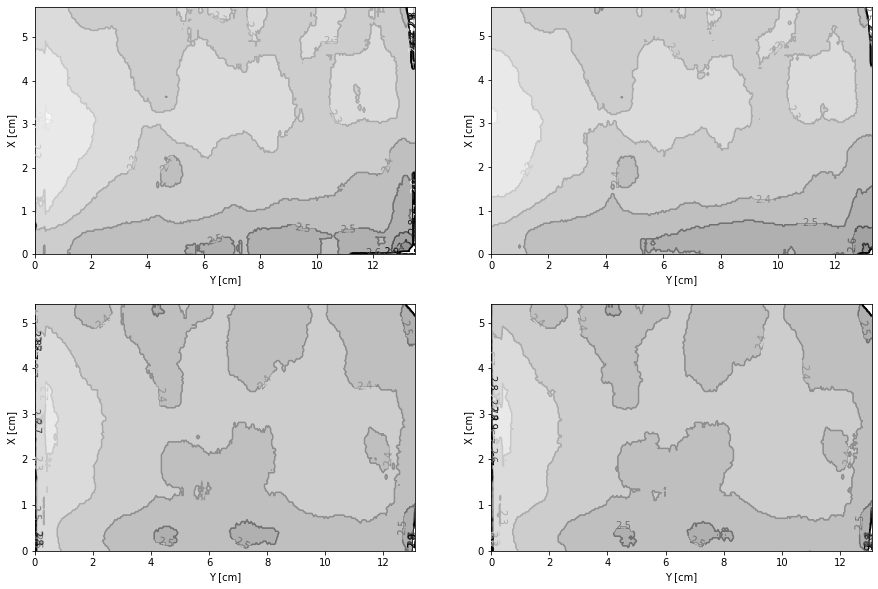

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
[lrd.dose_plane_plot(dose_dict, plane=plane, minimum=2., maximum=3., step=0.1, ax=ax)
    for plane, ax in zip(irrad2planes, (ax1, ax2, ax3, ax4))]
plt.show()

Promedio de las cuatro medidas de dosis

In [8]:
# Tamaño máximo de cada eje entre los cuatro planos 
maxshape = np.array([dose_dict[plane].values.shape for plane in irrad2planes]).max(axis=0)
# Padding de los cuatro planos
doseplanes = [dose_dict[plane] for plane in irrad2planes]
# ND array de los cuatro planos
stackplane = np.stack([lrd.to_shape(doseplane, maxshape) for doseplane in doseplanes])
# Promedio de los cuatro planos
plane2 = stackplane.mean(axis=0)
# Estimación de incertidumbres: desviaciones estándar de la dosis en los cuatro planos
stdplane2 = stackplane.std(axis=0)

Distribución de dosis promediada

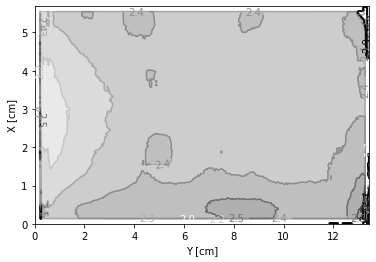

In [9]:
fig, ax = plt.subplots()
lrd.mean_dose_plane_plot(plane2, minimum=2., maximum=3., step=0.1, ax=ax)

Control de calidad de la calibración de 250 UM

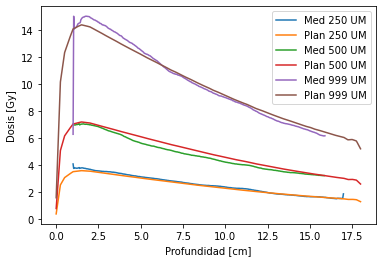

In [10]:
px_y = 50

fig, ax = plt.subplots()

ax.plot(dose_dict['I.1.t250.c250_est.dxf'].iloc[px_y], label='Med 250 UM')
ax.plot(pdd500df.z, pdd250df.D, label='Plan 250 UM')
ax.plot(dose_dict['I.1.t500.c250_est.dxf'].iloc[px_y], label='Med 500 UM')
ax.plot(pdd500df.z, pdd500df.D, label='Plan 500 UM')
ax.plot(dose_dict['I.1.t999.c250_est.dxf'].iloc[px_y], label='Med 999 UM')
ax.plot(pdd999df.z, pdd999df.D, label='Plan 999 UM')

ax.set_xlabel('Profundidad [cm]')
ax.set_ylabel('Dosis [Gy]')

ax.legend()
plt.show()

En este caso la el nivel de dosis relevante corresponde a 250 UM

## Irradiación de 4 Gy

Distribuciones de dosis

In [11]:
irrad4planes = ['III.1.c500.dxf', 'III.2.c500.dxf', 'IV.1.c500.dxf', 'IV.2.c500.dxf']

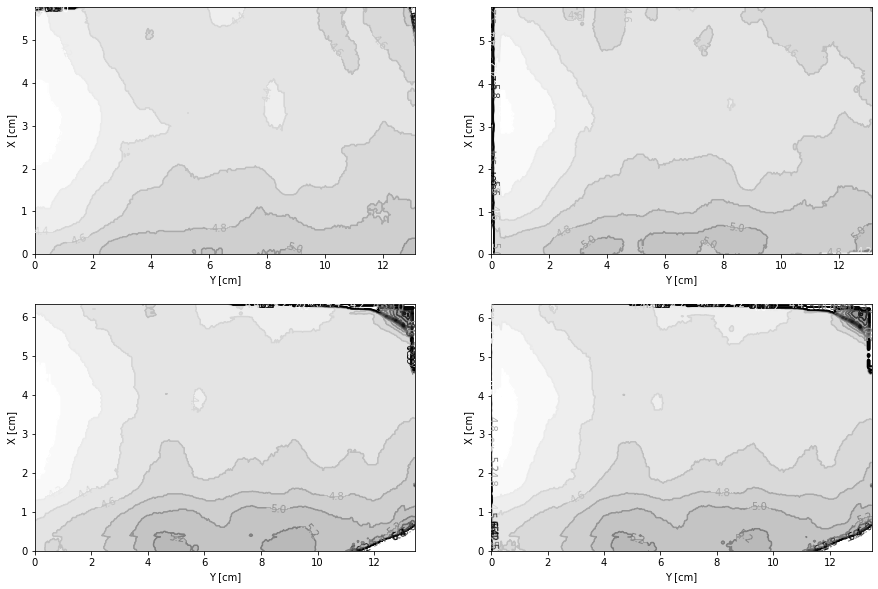

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
[lrd.dose_plane_plot(dose_dict, plane=plane, minimum=4., maximum=6.4, step=0.2, ax=ax)
    for plane, ax in zip(irrad4planes, (ax1, ax2, ax3, ax4))]
plt.show()

Promedio de las cuatro medidas de dosis

In [13]:
# Tamaño máximo de cada eje entre los cuatro planos 
maxshape = np.array([dose_dict[plane].values.shape for plane in irrad4planes]).max(axis=0)
# Padding de los cuatro planos
doseplanes = [dose_dict[plane] for plane in irrad4planes]
# ND array de los cuatro planos
stackplane = np.stack([lrd.to_shape(doseplane, maxshape) for doseplane in doseplanes])
# Promedio de los cuatro planos
plane4 = stackplane.mean(axis=0)
# Estimación de incertidumbres: desviaciones estándar de la dosis en los cuatro planos
stdplane4 = stackplane.std(axis=0)

Distribución de dosis promediada

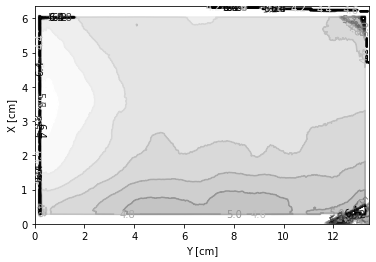

In [14]:
fig, ax = plt.subplots()
lrd.mean_dose_plane_plot(plane4, minimum=4., maximum=6.4, step=0.2, ax=ax)

Control de calidad de la calibración de 500 UM

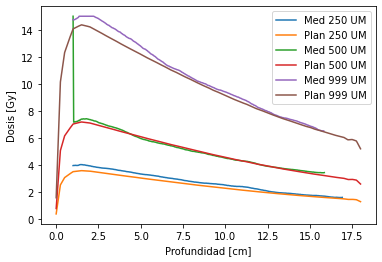

In [15]:
px_y = 50

fig, ax = plt.subplots()

ax.plot(dose_dict['III.1.t250.c500.dxf'].iloc[px_y], label='Med 250 UM')
ax.plot(pdd250df.z, pdd250df.D, label='Plan 250 UM')
ax.plot(dose_dict['III.1.t500.c500.dxf'].iloc[px_y], label='Med 500 UM')
ax.plot(pdd500df.z, pdd500df.D, label='Plan 500 UM')
ax.plot(dose_dict['III.1.t999.c500.dxf'].iloc[px_y], label='Med 999 UM')
ax.plot(pdd999df.z, pdd999df.D, label='Plan 999 UM')

ax.set_xlabel('Profundidad [cm]')
ax.set_ylabel('Dosis [Gy]')

ax.legend()
plt.show()

## Irradiación de 8 Gy

Distribuciones de dosis

In [16]:
irrad8planes = ['V.1.c999.dxf', 'V.2.c999.dxf', 'VI.1.c999.dxf', 'VI.2.c999.dxf']

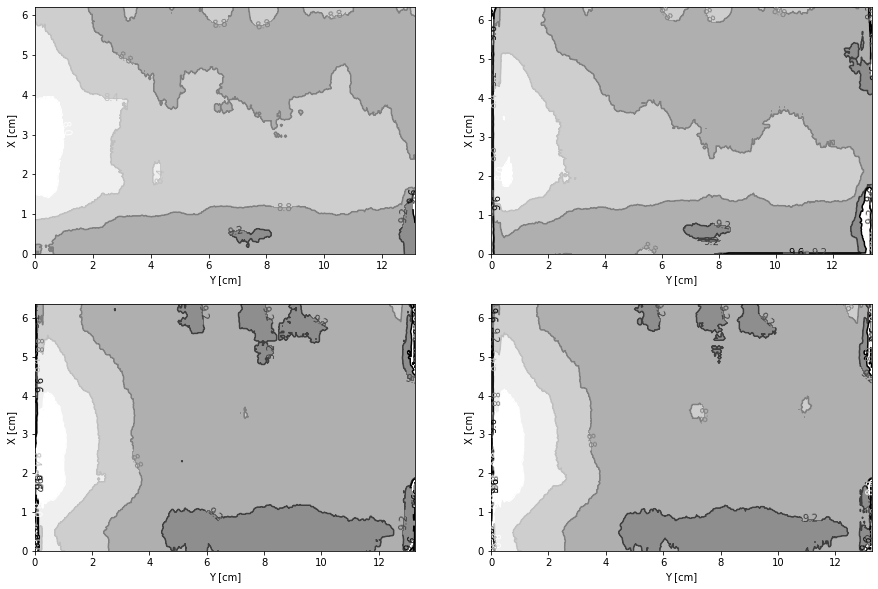

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
[lrd.dose_plane_plot(dose_dict, plane=plane, minimum=8., maximum=10., step=0.4, ax=ax)
    for plane, ax in zip(irrad8planes, (ax1, ax2, ax3, ax4))]
plt.show()

Promedio de las cuatro medidas de dosis

In [18]:
# Tamaño máximo de cada eje entre los cuatro planos 
maxshape = np.array([dose_dict[plane].values.shape for plane in irrad8planes]).max(axis=0)
# Padding de los cuatro planos
doseplanes = [dose_dict[plane] for plane in irrad8planes]
# ND array de los cuatro planos
stackplane = np.stack([lrd.to_shape(doseplane, maxshape) for doseplane in doseplanes])
# Promedio de los cuatro planos
plane8 = stackplane.mean(axis=0)
# Estimación de incertidumbres: desviaciones estándar de la dosis en los cuatro planos
stdplane8 = stackplane.std(axis=0)

Distribución de dosis promediada

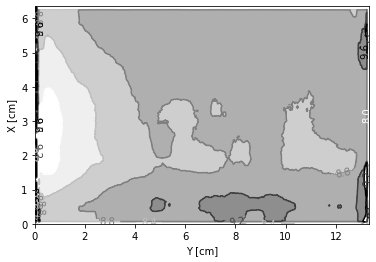

In [19]:
fig, ax = plt.subplots()
lrd.mean_dose_plane_plot(plane8, minimum=8., maximum=10., step=0.4, ax=ax)

Control de calidad de la calibración de 999 UM

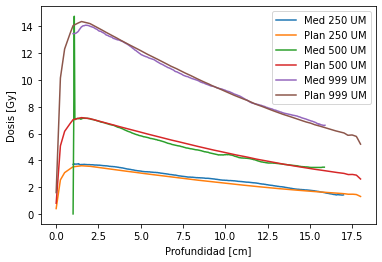

In [20]:
px_y = 25

fig, ax = plt.subplots()

ax.plot(dose_dict['V.1.t250.c999.dxf'].iloc[px_y], label='Med 250 UM')
ax.plot(pdd250df.z, pdd250df.D, label='Plan 250 UM')
ax.plot(dose_dict['V.1.t500.c999.dxf'].iloc[px_y], label='Med 500 UM')
ax.plot(pdd500df.z, pdd500df.D, label='Plan 500 UM')
ax.plot(dose_dict['V.1.t999.c999.dxf'].iloc[px_y], label='Med 999 UM')
ax.plot(pdd999df.z, pdd999df.D, label='Plan 999 UM')

ax.set_xlabel('Profundidad [cm]')
ax.set_ylabel('Dosis [Gy]')

ax.legend()
plt.show()

## Comparación con la referencia

Renormalizamos las tres distribuciones por su valor central y las promediamos

In [23]:
# Tamaño máximo de cada eje entre los cuatro planos 
maxshape = np.array([plane.shape for plane in (plane2, plane4, plane8)]).max(axis=0)
# Padding de los cuatro planos
doseplanes = [plane/plane[90, 190] for plane in (plane2, plane4, plane8)]
# ND array de los cuatro planos
stackplane = np.stack([lrd.to_shape(doseplane, maxshape) for doseplane in doseplanes])
# Promedio de los cuatro planos
plane_renorm = stackplane.mean(axis=0)

Representar la dostribución de dosis medida y la proporcionada por el fabricante 

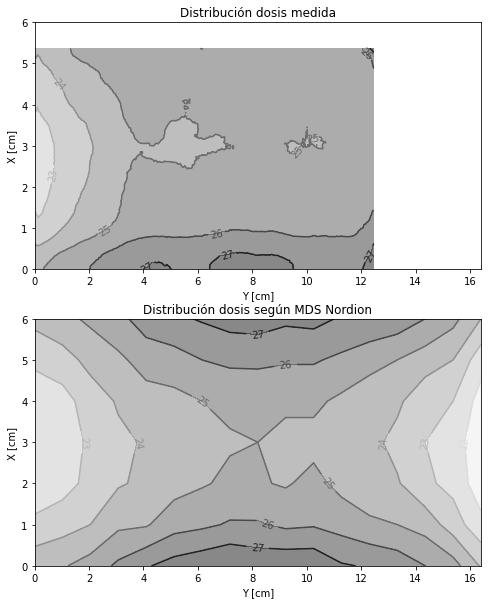

In [37]:
fig, (axm, axt) = plt.subplots(nrows=2, figsize=(8,10))

mrg = 14
lrd.mean_dose_plane_plot(plane_renorm[mrg:-mrg, mrg:-mrg]*25, minimum=21, maximum=29, step=1, ax=axm)
axm.set_title('Distribución dosis medida')
axm.set_xlim(0, 16.4)
axm.set_ylim(0, 6.)

lrd.mds_dose_plane_plot(minimum=21, maximum=29, step=1, ax=axt)
axt.set_title('Distribución dosis según MDS Nordion')
plt.show()

## Calibración

Comparamos las dosis nominales (dosis central en el *display* del irradiador con las dosis medida en el cenntro de los planos medidos.

In [32]:
nominal_doses = [2.05, 4.1, 8.2]
measured_doses = [plane[70, 80] for plane in (plane2, plane4, plane8)]
unc_measured_doses = np.array([plane[mrg:-mrg, mrg:-mrg].mean() for plane in (stdplane2, stdplane4, stdplane8)])

In [26]:
def calibrationf(x, a, b):
    return a*x + b

In [33]:
cal_params, cov_matrix = curve_fit(calibrationf, nominal_doses, measured_doses, p0=[1, 0], sigma=unc_measured_doses)
a, b =  cal_params
ua, ub = np.sqrt(cov_matrix[0,0]), np.sqrt(cov_matrix[1,1])

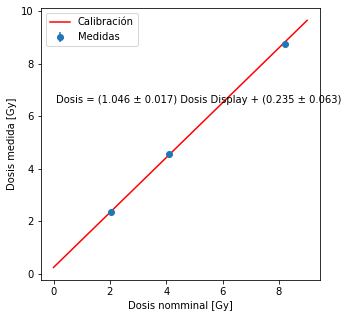

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot([0., 9.], [calibrationf(0., *cal_params), calibrationf(9., *cal_params)], 'r-', label='Calibración')
ax.errorbar(nominal_doses, measured_doses, yerr=unc_measured_doses, marker='o', linestyle='none', label='Medidas')
ax.set_xlabel('Dosis nomminal [Gy]')
ax.set_ylabel('Dosis medida [Gy]')
ax.text(x=0.1, y=6.5, s=f'Dosis = ({a:.3f} \u00B1 {ua:.3f}) Dosis Display + ({b:.3f} \u00B1 {ub:.3f})')
ax.legend()
plt.show()

### Chequeo de la calibración

Repetimos la calibración empleando la indicación de dosis mínima. Téngase en cuenta que en este caso la incertidumbre es mayor por la dificultad de determinar la dosis en el borde del detector.

In [29]:
nominal_minimum_doses = [1.74, 3.49, 6.99]
measured_minimum_doses = [plane[90, -12] for plane in (plane2, plane4, plane8)]
unc_measured_doses = np.array([plane[mrg:-mrg, mrg:-mrg].mean() for plane in (stdplane2, stdplane4, stdplane8)])

In [30]:
minimum_cal_params, minimum_cov_matrix = curve_fit(calibrationf, nominal_minimum_doses, measured_minimum_doses, p0=[1, 0], sigma=unc_measured_doses)
amin, bmin =  minimum_cal_params
uamin, ubmin = np.sqrt(minimum_cov_matrix[0,0]), np.sqrt(minimum_cov_matrix[1,1])

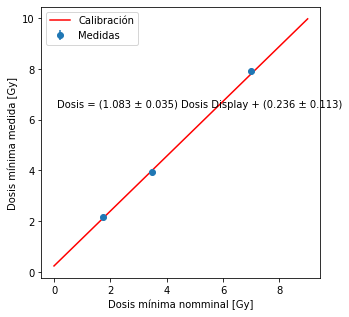

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot([0., 9.], [calibrationf(0., *minimum_cal_params), calibrationf(9., *minimum_cal_params)], 'r-', label='Calibración')
ax.errorbar(nominal_minimum_doses, measured_minimum_doses, yerr=unc_measured_doses, marker='o', linestyle='none', label='Medidas')
ax.set_xlabel('Dosis mínima nomminal [Gy]')
ax.set_ylabel('Dosis mínima medida [Gy]')
ax.text(x=0.1, y=6.5, s=f'Dosis = ({amin:.3f} \u00B1 {uamin:.3f}) Dosis Display + ({bmin:.3f} \u00B1 {ubmin:.3f})')
ax.legend()
plt.show()

## Conclusiones

Los resultados indican un error en el factor de calibración del orden del 5% y un error de cero de 0.25 Gy.

Hay que tener en cuenta que el cilindro de agua que hemos utilizado no ajusta complemtamente en el portamueestres. El diámetro es inferior en aproximadamente 1 cm. Del mapa de isodosis podemos estimar que eso supone una atenuación inferior en un 4 ó 5 % que jsutificaría la diferencia en el factor de calibración. 

Por tanto el único error en la calibración es el error sistemático de cero que para irradiaciones típicas de 25 Gy sería un error del orden del 1%.